# Домашнее задание 1

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Numpy

### Создайте двумерный массив 5x5 с 1 на границе и 0 внутри.

In [54]:
def border():
    a = np.ones((5, 5))
    a[1:-1, 1:-1].fill(0)
    return a

### Создайте матрицу 8x8 и заполните ее шахматным узором.

In [53]:
def checkerboard():
    a = np.ones((8, 8))
    a[::2, 1::2] = 0
    a[1::2, 0::2] = 0
    # return np.tile([[1, 0], [0, 1]], (4, 4))
    return a

### Вычтите из каждой строки матрицы среднее этой строки

In [51]:
def sub():
    a = np.array([
        [1, 2, 3],
        [3, 4, 5],
        [6, 7, 8]
    ])
    return a - np.reshape(np.mean(a, axis=1).astype(int), (3, 1))

### Как отсортировать матрицу по последней строке?

In [55]:
def sort():
    a = np.array([
        [1, 2, 3],
        [3, 4, 5],
        [6, 7, 8]
    ])
    a[-1].sort()
    return a

## Pandas

In [56]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df = pd.DataFrame(data, index=labels)

### Выберите данные в 3, 4, 5 строчке колонок `animal` и `age`

In [62]:
def animal_age(df):
    return df[['animal', 'age']][2:5]

### Выберите строки, где животное является котом и возраст меньше 3

In [66]:
def cats(df):
    return df.query('animal == "cat" & age < 3')

### Для каждого типа животного и количества посещений найдите средний возраст. Другими словами, каждая строка - это животное, каждый столбец - количество посещений, а значения - средний возраст

In [ ]:
def mean_table(df):
    return pd.pivot_table(df, index=['animal'], columns=['visits'], values='age', aggfunc='mean')

visits  animal
1       cat       2.5
        dog       3.0
        snake     4.5
2       cat       NaN
        dog       6.0
        snake     0.5
3       cat       2.5
        dog       NaN
        snake     NaN
dtype: float64

### DataFrame имеет столбец групп 'grps' и столбец целочисленных значений 'vals'. Для каждой группы найдите сумму трех наибольших значений.

In [90]:
def threesome():
    data = {
        "grps": ["a", "a", "a", "a", "b", "b", "b", "b"],
        "vals": [100, 200, 109, 50, 23, 100, 33, 67],
    }
    df = pd.DataFrame(data)
    def f(inp):
        return inp.sort_values()[-3:].sum()
    return df.groupby(by='grps').agg(f)['vals']

## Matplotlib

Тут сложно написать тесты, так что надеюсь на вашу честность. Поставьте `True`, если вы сделали задание 

### Нарисуйте пару смешных графиков для `df` (который с животными)
Это не дз по датавизу, если хотите - можем сделать такую пару

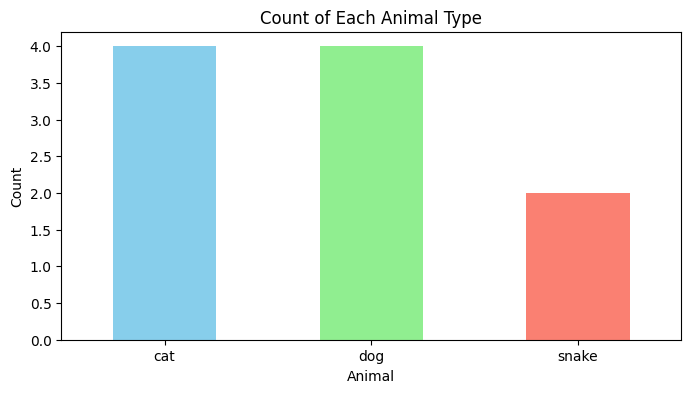

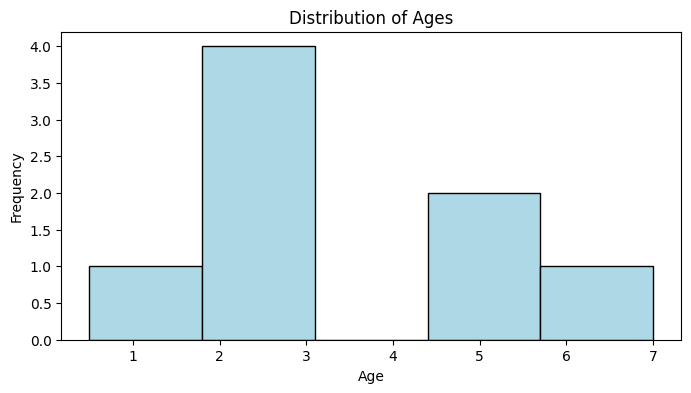

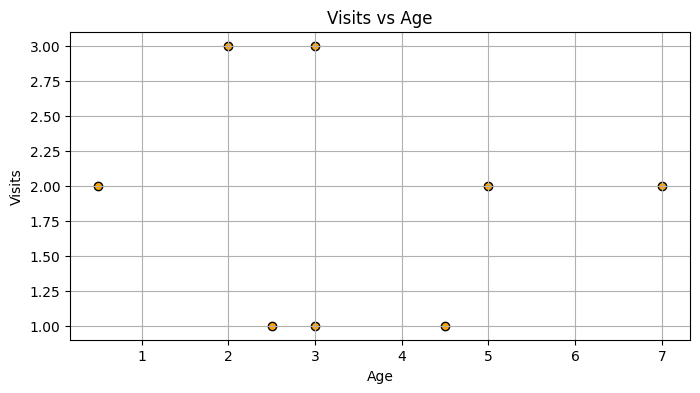

True

In [ ]:
def plots():
    animal_counts = df['animal'].value_counts()
    plt.figure(figsize=(8, 4))
    animal_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
    plt.title('Count of Each Animal Type')
    plt.xlabel('Animal')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    # plt.show()

    plt.figure(figsize=(8, 4))
    plt.hist(df['age'].dropna(), bins=5, color='lightblue', edgecolor='black')
    plt.title('Distribution of Ages')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    # plt.show()

    plt.figure(figsize=(8, 4))
    plt.scatter(df['age'], df['visits'], color='orange', edgecolor='black')
    plt.title('Visits vs Age')
    plt.xlabel('Age')
    plt.ylabel('Visits')
    plt.grid(True)
    plt.show()
    return True